In [1]:
import logging
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt 
import seaborn as sns
from ema import OptimizedEma

logging.basicConfig(level=logging.INFO)
sns.set_theme(style='darkgrid')

In [2]:
df_ufi = pd.read_csv('../input/us_financial_indices_2021.csv').assign(
    DATE=lambda d: pd.to_datetime(d.DATE)
).set_index('DATE')
df_ufi

,DJIA,SP500,NASDAQ100
DATE,,,
2021-01-04,30223.89,3700.65,12694.66
2021-01-05,30391.60,3726.86,12802.38
2021-01-06,30829.40,3748.14,12623.35
2021-01-07,31041.13,3803.79,12939.57
2021-01-08,31097.97,3824.68,13105.20
...,...,...,...
2021-12-27,36302.38,4791.19,16567.50
2021-12-28,36398.21,4786.35,16488.66
2021-12-29,36488.63,4793.06,16491.01


In [3]:
oe = OptimizedEma(y=df_ufi.SP500, test_size=30, span_range=(2, 31))
df_fit = oe.calculate_ema()
df_fit

INFO:ema:self.test_size: 30
INFO:ema:self.ewm_span_range: slice(2, 31, 1)
INFO:ema:result: 2.0
INFO:ema:self.ewm_span: 2


,SP500,SP500_ema
DATE,,
2021-01-04,3700.65,3700.650000
2021-01-05,3726.86,3718.123333
2021-01-06,3748.14,3738.134444
2021-01-07,3803.79,3781.904815
2021-01-08,3824.68,3810.421605
...,...,...
2021-12-27,4791.19,4763.678658
2021-12-28,4786.35,4778.792886
2021-12-29,4793.06,4788.304295


<AxesSubplot:xlabel='DATE'>

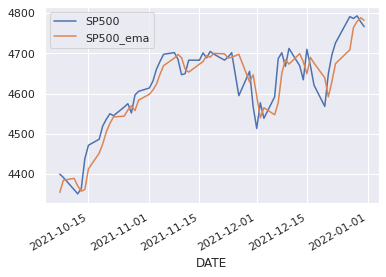

In [4]:
df_plt = df_fit.assign(SP500_ema=lambda d: d.SP500_ema.shift()).tail(60)
df_plt.plot.line()

In [5]:
lr_sp500 = np.log(df_ufi.SP500).diff().iloc[1:].ewm(span=6).mean()
oe = OptimizedEma(y=lr_sp500, span_range=(2, 31))
df_fit = oe.calculate_ema()
df_fit

INFO:ema:self.test_size: 125
INFO:ema:self.ewm_span_range: slice(2, 31, 1)
INFO:ema:result: 8.0
INFO:ema:self.ewm_span: 8


,SP500,SP500_ema
DATE,,
2021-01-05,0.007058,0.007058
2021-01-06,0.006262,0.006881
2021-01-07,0.010072,0.007590
2021-01-08,0.008297,0.007747
2021-01-11,0.003077,0.006709
...,...,...
2021-12-27,0.007078,0.002524
2021-12-28,0.004767,0.003022
2021-12-29,0.003805,0.003196


<AxesSubplot:xlabel='DATE'>

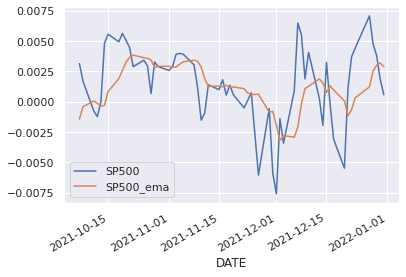

In [6]:
df_plt = df_fit.assign(SP500_ema=lambda d: d.SP500_ema.shift()).tail(60)
df_plt.plot.line()